In [30]:
import pandas as pd
import numpy as np
data = pd.read_csv('./data/americaData.csv')
data.head(10)

,index,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime
0,0,United States of America,971002,24632468,0,10845438,410378,2021/1/22 23:40
1,1,United States of America,971002,24632468,0,10845438,410378,2021/1/22 20:56
2,2,United States of America,971002,24632468,0,10845438,410378,2021/1/22 19:16
3,3,United States of America,971002,24632468,0,10845438,410378,2021/1/22 19:14
4,4,United States of America,971002,24619597,0,10845438,409877,2021/1/22 15:21
5,5,United States of America,971002,24619597,0,10845438,409877,2021/1/22 11:40
6,6,United States of America,971002,24619597,0,10845438,409877,2021/1/22 11:13
7,7,United States of America,971002,24432829,0,10562082,406001,2021/1/22 11:04
8,8,United States of America,971002,24432829,0,10562082,406001,2021/1/22 10:23
9,9,United States of America,971002,24432829,0,10562082,406001,2021/1/22 10:02


In [31]:
data['updateTime'] = pd.to_datetime(data['updateTime'])
data = data[::-1]
data.head(10)

,index,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime
2566,2566,United States of America,971002,5,0,0,0,2020-01-27 17:20:00
2565,2565,United States of America,971002,6,0,0,0,2020-01-31 07:17:00
2564,2564,United States of America,971002,6,0,0,0,2020-02-01 02:48:00
2563,2563,United States of America,971002,8,0,0,0,2020-02-02 07:41:00
2562,2562,United States of America,971002,9,0,0,0,2020-02-03 09:28:00
2561,2561,United States of America,971002,11,0,0,0,2020-02-04 07:11:00
2560,2560,United States of America,971002,12,0,0,0,2020-02-06 10:59:00
2559,2559,United States of America,971002,12,0,0,0,2020-02-10 14:08:00
2558,2558,United States of America,971002,12,0,0,0,2020-02-10 15:19:00
2557,2557,United States of America,971002,12,0,0,0,2020-02-10 15:27:00


In [32]:
data = data[['updateTime', 'province_confirmedCount']]
data.reset_index(drop=True, inplace=True)
data.head(10)

,updateTime,province_confirmedCount
0,2020-01-27 17:20:00,5
1,2020-01-31 07:17:00,6
2,2020-02-01 02:48:00,6
3,2020-02-02 07:41:00,8
4,2020-02-03 09:28:00,9
5,2020-02-04 07:11:00,11
6,2020-02-06 10:59:00,12
7,2020-02-10 14:08:00,12
8,2020-02-10 15:19:00,12
9,2020-02-10 15:27:00,12


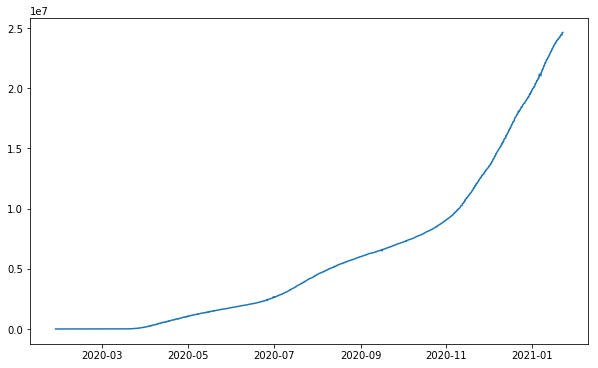

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data['updateTime'], data['province_confirmedCount'])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 2 columns):
updateTime                 2567 non-null datetime64[ns]
province_confirmedCount    2567 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 40.2 KB


In [35]:
data['updateTime'] = pd.to_datetime(data['updateTime']).dt.normalize()
data.head(10)

,updateTime,province_confirmedCount
0,2020-01-27,5
1,2020-01-31,6
2,2020-02-01,6
3,2020-02-02,8
4,2020-02-03,9
5,2020-02-04,11
6,2020-02-06,12
7,2020-02-10,12
8,2020-02-10,12
9,2020-02-10,12


In [36]:
data.columns = ['date', 'confirmedCount']
data_merge = data['confirmedCount'].groupby(data['date']).max()
data_merge = data_merge.to_frame()
data_merge.head(30)

,confirmedCount
date,
2020-01-27,5
2020-01-31,6
2020-02-01,6
2020-02-02,8
2020-02-03,9
2020-02-04,11
2020-02-06,12
2020-02-10,12
2020-02-11,13


In [37]:
data_merge['lastDayConfirmedCount'] = data_merge['confirmedCount'].shift(1)
data_merge['diffCount'] = data_merge['confirmedCount'] - data_merge['lastDayConfirmedCount']
data_diff = data_merge[['diffCount']]
data_diff

,diffCount
date,
2020-01-27,NaN
2020-01-31,1.0
2020-02-01,0.0
2020-02-02,2.0
2020-02-03,1.0
...,...
2021-01-18,169786.0
2021-01-19,150130.0
2021-01-20,175511.0


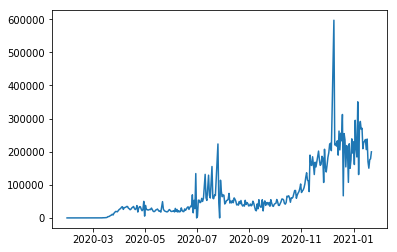

In [38]:
plt.plot(data_diff)

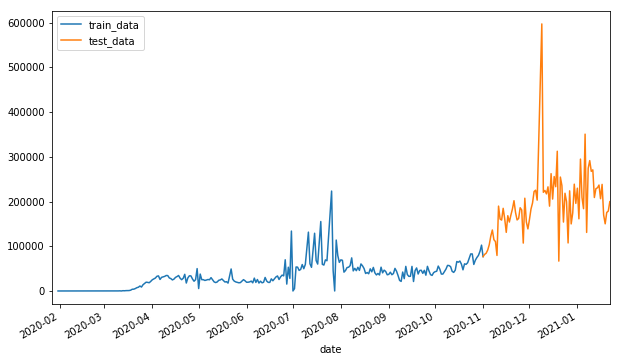

In [39]:
# split training data and test data
split_date = pd.to_datetime('2020-11-01')
data = data_diff['diffCount']
train_data = data.loc[:split_date]
test_data = data.loc[split_date:]
plt.figure(figsize=(10, 6))
ax = train_data.plot()
test_data.plot(ax=ax)
plt.legend(['train_data', 'test_data'])

In [40]:
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_sc = scaler.fit_transform(train_data.to_frame())
test_sc = scaler.transform(test_data.to_frame())
test_sc

array([[0.34380276],
       [0.36613872],
       [0.37798287],
       [0.40989714],
       [0.46326522],
       [0.54940287],
       [0.61037897],
       [0.51327485],
       [0.49452124],
       [0.35572303],
       [0.84953676],
       [0.71998997],
       [0.70973997],
       [0.82731274],
       [0.72184831],
       [0.58683844],
       [0.75353869],
       [0.68992061],
       [0.75987498],
       [0.82136156],
       [0.90364818],
       [0.78555148],
       [0.71077885],
       [0.72573517],
       [0.83319228],
       [0.81015328],
       [0.47934103],
       [0.92855448],
       [0.69008629],
       [0.62120663],
       [0.71432985],
       [0.82007192],
       [0.88127191],
       [0.99537877],
       [1.00900961],
       [0.90925904],
       [2.6732358 ],
       [0.98766328],
       [1.00645719],
       [0.97190093],
       [1.04234787],
       [0.84913822],
       [1.17439335],
       [0.91981802],
       [1.14547034],
       [1.04356139],
       [1.39880081],
       [0.298

In [41]:
# get train & test data
def getXYSequence(dataset, window_size):
    dataX, dataY = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i : (i + window_size)]
        dataX.append(a)
        dataY.append(dataset[i + window_size])

    return np.array(dataX), np.array(dataY)
window_size = 10
X_train, y_train = getXYSequence(train_sc, window_size)
X_test, y_test = getXYSequence(test_sc, window_size)

In [42]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [43]:
# create lstm model
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense
lstm_model = Sequential()
lstm_model.add(LSTM(4, input_shape=(None, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)
lstm_model.save(os.path.join('.\model', 'test.h5'))

Epoch 1/100
253/253 - 1s - loss: nan
Epoch 2/100
253/253 - 1s - loss: nan
Epoch 3/100
253/253 - 1s - loss: nan
Epoch 4/100
253/253 - 1s - loss: nan
Epoch 5/100
253/253 - 1s - loss: nan
Epoch 6/100
253/253 - 1s - loss: nan
Epoch 7/100
253/253 - 1s - loss: nan
Epoch 8/100
253/253 - 1s - loss: nan
Epoch 9/100
253/253 - 1s - loss: nan
Epoch 10/100
253/253 - 1s - loss: nan
Epoch 11/100
253/253 - 1s - loss: nan
Epoch 12/100
253/253 - 1s - loss: nan
Epoch 13/100
253/253 - 1s - loss: nan
Epoch 14/100
253/253 - 1s - loss: nan
Epoch 15/100
253/253 - 1s - loss: nan
Epoch 16/100
253/253 - 1s - loss: nan
Epoch 17/100
253/253 - 1s - loss: nan
Epoch 18/100
253/253 - 1s - loss: nan
Epoch 19/100
253/253 - 1s - loss: nan
Epoch 20/100
253/253 - 1s - loss: nan
Epoch 21/100
253/253 - 1s - loss: nan
Epoch 22/100
253/253 - 1s - loss: nan
Epoch 23/100
253/253 - 1s - loss: nan
Epoch 24/100
253/253 - 1s - loss: nan
Epoch 25/100
253/253 - 1s - loss: nan
Epoch 26/100
253/253 - 1s - loss: nan
Epoch 27/100
253/253 

OSError: Unable to create file (unable to open file: name = '.\model\test.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)